In [31]:
# -*- coding: utf-8 -*-
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient



In [5]:
import yaml
def yaml_loader(config_path):
    with open(config_path) as f:
        return yaml.load(f)
    
config=yaml_loader("../server/config.yaml")

In [56]:
db = MongoClient(config.get("mongo_uri").format(config.get("mongo_username"),config.get("mongo_password")))
coll = db.ethereum.orders
# GET max and min prices.
result=coll.aggregate([{"$group" : { "_id":None, "maxPrice" : {"$max": "$price"}, "minPrice" : {"$min": "$price"}
}}])
data=result.next()
print(data)
max_price = int(data["maxPrice"])
min_price = int(data["minPrice"])

# print(y)

result=coll.find({})
datas=[]
for data in result:
    datas.append(data)

{'_id': None, 'maxPrice': 223.99, 'minPrice': 201}


[    0.          3855.97896295     0.             0.
     0.          7963.31506196 14300.17905021     0.
     0.             0.          8803.19291256     0.
  5532.23312229     0.             0.             0.
 11077.02741774  7516.73876049 17849.77077338     0.
  3099.2941152   2085.19031497  2567.39794529]
[ 3891.1471291      0.          5923.851083    6342.04995831
 12761.38063813     0.             0.         16083.20067247
  9881.23931111  9891.89561737     0.          5271.98371849
     0.          3436.74094916  3068.33433162  6141.16012047
     0.             0.             0.          6605.12799298
     0.             0.             0.        ]


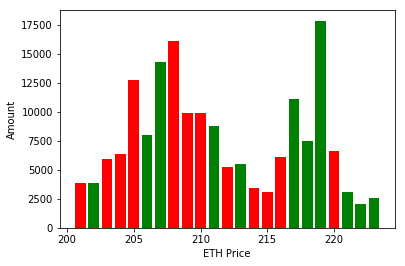

In [57]:
x = np.linspace(min_price,max_price,(max_price-min_price+1))
# print(x)

y = np.zeros((max_price-min_price+1))
y2 = np.zeros((max_price-min_price+1))


for data in datas:
        y[int(data["price"])-min_price]+=abs(data["amount"])
        y2[int(data["price"])-min_price]+=data["amount"]
# print(y)
# print(y2)
# print(x.shape)
for i in range(0,x.shape[0]):
    if y2[i]<0:
        y2[i]=y[i]
        y[i] = 0
    else:
        y2[i]=0
print(y)
print(y2)

plt.xlabel('ETH Price')
plt.ylabel('Amount')

plt.bar(x, y, color="green")
plt.bar(x,y2,color="red")
plt.show()




[ 944.73898       0.            0.            0.            0.
 2655.40679603 5652.2661406     0.         2387.89168748 1806.04348972
 1998.50034493  847.49544257    0.            0.          766.42852136
    0.         1217.439      1113.09810615 3605.50963116    0.
    0.            0.            0.        ]
[   0.          411.34061    1755.38015307 1570.152      2004.04380818
    0.            0.         5173.08727989    0.            0.
    0.            0.          348.554         0.            0.
  348.554         0.            0.            0.          663.50829092
    0.            0.          380.9       ]


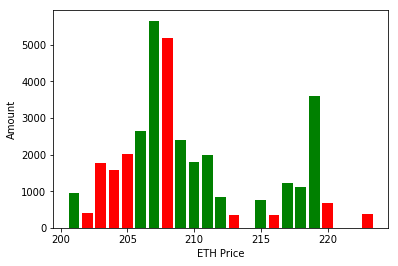

In [58]:
# Set a threshold for small orders.

y = np.zeros((max_price-min_price+1))
y2 = np.zeros((max_price-min_price+1))
threshold=300

for data in datas:
    if abs(data["amount"])>=threshold:
        y[int(data["price"])-min_price]+=abs(data["amount"])
        y2[int(data["price"])-min_price]+=data["amount"]

for i in range(0,x.shape[0]):
    if y2[i]<0:
        y2[i]=y[i]
        y[i] = 0
    else:
        y2[i]=0
print(y)
print(y2)

plt.xlabel('ETH Price')
plt.ylabel('Amount')

plt.bar(x, y, color="green")
plt.bar(x,y2,color="red")
plt.show()


